In [ ]:
#@title install

from IPython.display import clear_output
!pip install deepface
!pip install mediapipe
from IPython.display import Audio
from google.colab import output
from IPython.display import clear_output
from google.colab.patches import cv2_imshow

def successful():
  output.eval_js('new Audio("https://www.myinstants.com/media/sounds/anime-wow-sound-effect.mp3").play()')

def error():
  output.eval_js('new Audio("https://www.myinstants.com/media/sounds/movie_1.mp3").play()')
clear_output()

In [ ]:
#@title utils

import cv2
import numpy as np
from deepface import DeepFace
import math
import time
def deep_data_extract(img):
    embedding=None
    faces=[]
    facial_data=[]
    try:
        embedding = DeepFace.represent(img, model_name='Facenet',detector_backend='ssd')
        if embedding:
          for  i in range(len(embedding)):
            x, y, w, h = embedding[i]['facial_area']['x'], embedding[i]['facial_area']['y'], embedding[i]['facial_area']['w'], embedding[i]['facial_area']['h']
            x1, y1, x2, y2 = x, y, x+w, y+h
            faces.append((x1, y1, x2, y2 ))
            facial_data.append(embedding[i]['embedding'])
    except:
        pass
    return faces,facial_data


def rgb_to_bgr(rgb_color):
    bgr_color = (rgb_color[2], rgb_color[1], rgb_color[0])
    return bgr_color

def drawBox(img, x1, y1, x2, y2, l=30, t=5, rt=1, text="Unknown", id=None,display_id=False,draw_rect=False,color=(2, 240, 228),text_color=(255,255,255)):
    # Define the sci-fi style font
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.7
    thickness = 2
    # color = (255, 255, 255)
    color=rgb_to_bgr(color)
    text_color=rgb_to_bgr(text_color)
    # Draw the ID of the detected person on top of the bounding box
    ((id_width, id_height), _) = cv2.getTextSize(str(id), font, fontScale=fontScale, thickness=thickness)
    id_offset_x = x1 + int((x2 - x1 - id_width) / 2)
    id_offset_y = y1 - 35
    if display_id:
        cv2.putText(img, str(id), (id_offset_x, id_offset_y+25), font, fontScale, text_color, thickness)
        # Draw the name of the detected person inside the bounding box
        ((text_width, text_height), _) = cv2.getTextSize(text, font, fontScale=fontScale, thickness=thickness)
        text_offset_x = x1 + int((x2 - x1 - text_width) / 2)
        text_offset_y = y2 + 25
        cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale, text_color, thickness)
        # Draw box around face
    if draw_rect:
        cv2.rectangle(img, (x1, y1), (x2, y2), color,thickness=rt)
    t=t-3
    face_width = x2 - x1
    face_height = y2 - y1
    # l = int(l * min(face_width, face_height) / 100)-20

    # Draw top-left corner
    cv2.line(img, (x1, y1), (x1 + l, y1), color, thickness=t)
    cv2.line(img, (x1, y1), (x1, y1 + l), color, thickness=t)
    # Draw top-right corner
    cv2.line(img, (x2, y1), (x2 - l, y1), color, thickness=t)
    cv2.line(img, (x2, y1), (x2, y1 + l), color, thickness=t)
    # Draw bottom-left corner
    cv2.line(img, (x1, y2), (x1 + l, y2), color, thickness=t)
    cv2.line(img, (x1, y2), (x1, y2 - l), color, thickness=t)
    # Draw bottom-right corner
    cv2.line(img, (x2, y2), (x2 - l, y2), color, thickness=t)
    cv2.line(img, (x2, y2), (x2, y2 - l), color, thickness=t)
    return img

def white_overlay(img):
    white_img = np.ones_like(img) * 255
    alpha = 0.5
    result = cv2.addWeighted(img, alpha, white_img, 1-alpha, 0)
    x1 = 60
    y1 = 60
    x2 = img.shape[1] - 60
    y2 = img.shape[0] - 60
    mid_x = (img.shape[1]) // 2
    roi = img[y1:y2, x1:x2]
    result[y1:y2, x1:x2] = roi
    return result



def fps_display(img,pTime):
    mid_x = (img.shape[1]) // 2
    fps = 0
    cTime = time.time()
    if cTime - pTime > 0:
        fps = 1 / (cTime - pTime)
    pTime = cTime
    # text = f'FPS: {int(fps)}'
    text=str(int(fps))
    font = cv2.FONT_HERSHEY_PLAIN
    font_scale = 3
    thickness = 3
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
    x = img.shape[1] - text_size[0] - 20
    color=rgb_to_bgr((240, 0, 148))
    cv2.putText(img, text, (mid_x, 45), font, font_scale,color, thickness)
    return img,pTime






In [ ]:
!wget https://storage.googleapis.com/afs-prod/media/50fc29e6e65549d98a27a0b52f846b88/3000.jpeg

--2023-05-10 11:50:24--  https://storage.googleapis.com/afs-prod/media/50fc29e6e65549d98a27a0b52f846b88/3000.jpeg
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 913727 (892K) [image/jpeg]
Saving to: ‘3000.jpeg’

3000.jpeg           100%[===================>] 892.31K  --.-KB/s    in 0.01s   

2023-05-10 11:50:25 (68.4 MB/s) - ‘3000.jpeg’ saved [913727/913727]



(444, 28, 535, 152) [0.15806037187576294, -2.6941704750061035, -0.5270585417747498, -1.775068998336792, -0.32583072781562805, -0.8352189660072327, 0.7571818828582764, 1.3348872661590576, -0.4505425691604614, 0.5437265038490295, 0.9992900490760803, -0.3641567528247833, 0.46270936727523804, -0.7995470762252808, 0.7340607643127441, 0.44355469942092896, 1.041529893875122, -1.1705214977264404, 0.8672291040420532, -1.5461597442626953, -1.077011227607727, 0.5861416459083557, -1.3969109058380127, 1.1781837940216064, 1.838948369026184, 0.8561339378356934, 0.654874324798584, 1.5496124029159546, -0.29394787549972534, -2.8476104736328125, -0.5342994928359985, 1.893306016921997, 0.21900975704193115, -1.2084026336669922, 0.8548569679260254, 1.6921515464782715, -1.6882106065750122, 0.9955019950866699, -0.09615980088710785, -1.4015344381332397, -0.7353445291519165, 1.1111586093902588, -0.25584226846694946, -2.1914772987365723, 0.25200605392456055, -0.8003628253936768, 0.12933604419231415, -0.103048868

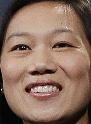

(204, 40, 285, 152) [-1.6448545455932617, -1.3363183736801147, -1.4211418628692627, 0.3981750011444092, 1.627812385559082, 0.4392710328102112, -0.2112940549850464, 1.9780594110488892, 0.6522440314292908, 0.22420300543308258, 0.5420137047767639, -2.131826162338257, -0.24949081242084503, 0.399768203496933, 0.7788342237472534, 1.292527437210083, 1.2915451526641846, -0.45001888275146484, -1.347895860671997, 1.452462077140808, 0.23403313755989075, 0.26809385418891907, 0.8585800528526306, 1.3274279832839966, -1.3614261150360107, 0.8336566090583801, 2.450273036956787, 0.8231768012046814, -0.657862663269043, 0.5876199007034302, -0.6348344087600708, 0.8227732181549072, -0.3364693224430084, -0.05646204203367233, 0.39955490827560425, 1.5873987674713135, -1.5160009860992432, -1.0279055833816528, 0.834822952747345, -0.5105596780776978, -1.793114423751831, -2.2588977813720703, -0.8728899955749512, -2.2388923168182373, 1.2426865100860596, -1.4643574953079224, 1.1234090328216553, -1.3402386903762817, 

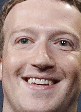

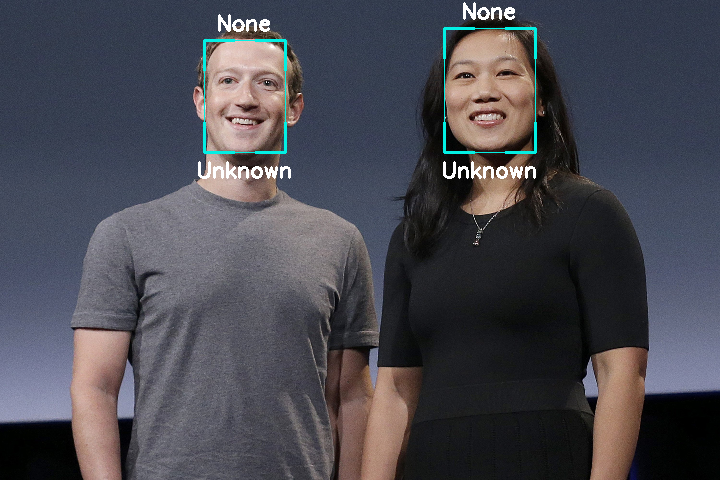

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img_path = '/content/3000.jpeg'  #@param {type: "string"}
img=cv2.imread(img_path)
img=cv2.resize(img,(720,480))
faces,facial_data=deep_data_extract(img)
pTime = 0

if len(faces)!=0 and len(facial_data)!=0:
  if len(faces)==len(facial_data):
    for i in range(len(faces)):
      print(faces[i],facial_data[i])
      x1,y1,x2,y2=faces[i]
      crop_img = img[y1:y2, x1:x2]
      # crop_img=cv2.resize(crop_img,(200,300))
      cv2_imshow(crop_img)
      draw_img=drawBox(img, x1, y1, x2, y2, l=30, t=5, rt=1, text="Unknown", id=None,display_id=True,draw_rect=True)
# draw_img=cv2.resize(draw_img,(1280,720))
cv2_imshow(draw_img)



In [ ]:
#@title config
# cap = cv2.VideoCapture(0)
# pTime = 0
# while True:
#     ret, img = cap.read()
#     img=cv2.flip(img,1)
#     faces,facial_data=deep_data_extract(img)
#     show_img=white_overlay(img)
#     mid_x = (img.shape[1]) // 2

#     if len(faces)!=0 and len(facial_data)!=0:
#         if len(faces)==len(facial_data):
#             print(faces[0],facial_data[0])
#             x1,y1,x2,y2=faces[0]
#             crop_img = img[y1:y2, x1:x2]
#             l = int(0.1 * math.sqrt((x2-x1)**2 + (y2-y1)**2))
#             draw_img=drawBox(img, x1, y1, x2, y2, l=l, t=5, rt=1, text="Unknown", id=None,display_id=True,draw_rect=True,color=(2, 240, 228),text_color=(255,255,255))
#             overlay = white_overlay(draw_img)
#             show_img=overlay
#     show_img,pTime=fps_display(show_img,pTime,mid_x)
#     cv2.imshow('Video ', show_img)

#     # Exit on key press
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release video capture device and close windows
# cap.release()
# cv2.destroyAllWindows()
import sys
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline
import IPython
from google.colab import output

display(IPython.display.Javascript('''
function ClickConnect(){
  btn = document.querySelector("colab-connect-button")
  if (btn != null){
    console.log("Click colab-connect-button");
    btn.click()
    }

  btn = document.getElementById('ok')
  if (btn != null){
    console.log("Click reconnect");
    btn.click()
    }
  }

setInterval(ClickConnect,60000)
'''))

clear_output()

In [ ]:
# @title ##**js to image** { display-mode: "form" }

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# @title ##**video stream** { display-mode: "form" }

# JavaScript to properly create our live video stream using our webcam as input
def video_stream_mirror():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      video.style.transform = 'scaleX(-1)'; // mirror frame
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      // video.style.transform = 'scaleX(-1)'; // mirror frame
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data


In [ ]:
#@title Registration
def generate_csv(img, name,id_number,branch_name,designation,face_data):
    with open('database.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([face_data, name,id_number,branch_name,designation])

def call():
  name = 'ben'  #@param {type: "string"}
  id_number = 41  #@param {type: "number"}
  branch_name ='BTECH' #@param {type: "string"}
  designation = "Student" #@param ["Student", "Teacher"] {allow-input: true}
  import json
  try:
      with open('database.json', 'r') as f:
          data = json.load(f)
  except:
      data={}
  if str(id_number) in data:
    error()
    # time.sleep(4)
    return "Error: ID number already exists in database"

  mirro_video = True
  ##@param {type:"boolean"}
  data[id_number] = {
            "name": name,
            "branch_name": branch_name,
            "designation": designation,
        }

  with open("database.json", "w") as f:
      json.dump(data, f, indent=4)
  if not os.path.exists("database.csv"):
    with open('database.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["face_data", "name","id_number","branch_name","designation"])
  # start streaming video from webcam
  if mirro_video:
    video_stream_mirror()
  else:
    video_stream()
  # label for video
  label_html = 'Capturing...'

  # initialize bounding box to empty
  bbox = ''
  count = 0
  person_alarm_played = False
  pTime = 0
  start_time = time.time()
  while True:
      js_reply = video_frame(label_html, bbox)
      if not js_reply:
          break
      if time.time() - start_time >= 30:
          print("Registraction complete")
          successful()
          break
      # convert JS response to OpenCV Image
      frame = js_to_image(js_reply["img"])
      if mirro_video:
        frame=cv2.flip(frame,1)
      #object detection
      faces,facial_data=deep_data_extract(frame)
      # create transparent overlay for bounding box
      bbox_array = np.zeros([480,640,4], dtype=np.uint8)
      if len(faces)!=0 and len(facial_data)!=0:
        if len(faces)==len(facial_data):
          # print(faces[0],facial_data[0])
          x1,y1,x2,y2=faces[0]
          crop_img = frame[y1:y2, x1:x2]
          # cv2_imshow(crop_img)
          generate_csv(img, name,id_number,branch_name,designation,facial_data[0])
          x1,y1,x2,y2=faces[0]
          l = int(0.1 * math.sqrt((x2-x1)**2 + (y2-y1)**2))
          bbox_array=drawBox(bbox_array, x1, y1, x2, y2, l=l, t=5, rt=1, text="Unknown", id=None,display_id=True,draw_rect=False)
      else:
          bbox_array = np.zeros([480,640,4], dtype=np.uint8)
      # bbox_array,pTime=fps_display(bbox_array,pTime)
      bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
      # convert overlay of bbox into bytes
      bbox_bytes = bbox_to_bytes(bbox_array)
      # update bbox so next frame gets new overlay
      bbox = bbox_bytes
  time.sleep(4)
  clear_output()



call()

In [ ]:
# https://colab.research.google.com/github/p-p-p-p/college-attendance-system-/blob/main/unknown_face.ipynb

download unknow face data[unknow.ipynb](https://colab.research.google.com/github/p-p-p-p/college-attendance-system-/blob/main/unknown_face.ipynb)

In [ ]:
from google.colab import files

uploaded = files.upload()
clear_output()

unkn_csv=[]
for fn in uploaded.keys():
  unkn_csv.append(fn)
unknow_file_path=unkn_csv[-1]
import csv

# Open the first CSV file in append mode
with open('database.csv', mode='a', newline='') as file1:
    writer = csv.writer(file1)

    # Open the second CSV file in read mode
    with open(unknow_file_path, mode='r') as file2:
        reader = csv.reader(file2)

        # Skip the header row of the second CSV file
        next(reader)

        # Append the remaining rows to the first CSV file
        for row in reader:
            writer.writerow(row)

print('Data appended successfully!')

##Model building

In [ ]:
import pandas as pd
import os ,csv
import pandas as pd
import plotly.graph_objects as go


if not os.path.exists("database.csv"):
    with open('database.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["face_data", "name","id_number","branch_name","designation"])


In [ ]:
df = pd.read_csv('./database.csv')
store_df=df
df["face_data"] = df["face_data"].apply(eval)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,face_data,name,id_number,branch_name,designation
0,"[-2.558459520339966, -0.2813572287559509, -0.5...",Ali,35,MCA,Student
1,"[-2.1036272048950195, -0.13655224442481995, -1...",ben,41,MCA,Student
2,"[-1.8747771978378296, -0.5029681921005249, -1....",Ali,35,MCA,Student
3,"[-2.1371421813964844, -0.5430973768234253, -1....",Ali,35,MCA,Student
4,"[-1.5806185007095337, 0.22780346870422363, -2....",ben,41,MCA,Student


In [ ]:

# Extract the unique values in the 'name' column
unique_names = df['name'].unique()

# Create a new DataFrame that counts the number of occurrences of each unique name
name_counts = pd.DataFrame({'name': unique_names, 'count': df['name'].value_counts()})

# Create a histogram of the name counts
fig = go.Figure(data=[go.Bar(x=name_counts['name'], y=name_counts['count'])])
fig.update_layout(title='Distribution of Unique Names', xaxis_title='Name', yaxis_title='Count',
                  width=800, height=500)
fig.show()


In [ ]:
# Group the data by id_number and name, and count the number of occurrences
grouped_data = df.groupby(['id_number', 'name']).count()
# Display the grouped data in a DataFrame
print("Overview of the dataset:")
print(grouped_data)


Overview of the dataset:
                face_data  branch_name  designation
id_number name                                     
35        Ali          16           16           16
39        alex          3            3            3
40        ben           2            2            2
41        ben           9            9            9


In [ ]:
import pandas as pd

# Set the value of Clean_Data
Clean_Data = "Yes" #@param ["No", "Yes", ] {allow-input: true}


# Check if Clean_Data is equal to "Yes"
if Clean_Data == "Yes":
    # Get the unique id_numbers from the DataFrame
    id_numbers = df['id_number'].unique()

    # Prompt the user to enter an id_number to delete
    selected_id = input("Enter an id_number to delete: ")

    # Check if the selected_id is in the DataFrame
    if int(selected_id) in id_numbers:
        # Delete the rows with the selected_id from the DataFrame
        df = df.drop(df[df['id_number'] == int(selected_id)].index)
        print("Rows with id_number {} have been deleted.".format(selected_id))

        # Group the data by id_number and name, and count the number of occurrences
        grouped_data = df.groupby(['id_number', 'name']).count()
        print("\n\nOverview of the dataset:")
        print(grouped_data)
    else:
        print("Selected id_number not found in the dataset.")
else:
    print("No rows have been deleted.")


Enter an id_number to delete: 35
Rows with id_number 35 have been deleted.


Overview of the dataset:
                face_data  branch_name  designation
id_number name                                     
39        alex          3            3            3
41        ben           9            9            9


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json
import pickle
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["face_data"], df["id_number"], test_size=0.2, random_state=42)

# Create the SVM model
clf = svm.SVC(kernel='linear')

# Train the model on the training set
clf.fit(list(X_train), list(y_train))

# Test the model on the testing set
y_pred = clf.predict(list(X_test))

# Calculate the accuracy of the model
acc = accuracy_score(list(y_test), y_pred)
#display accuracy
print("Accuracy: ",acc)
pickle.dump(clf, open('svm_model.pkl', 'wb'))
print('Model saved at svm_model.pkl file')


Accuracy:  1.0
Model saved at svm_model.pkl file


In [ ]:
# person_id = clf.predict([[-1.5695440769195557, -0.5940179824829102, -1.7758464813232422, 1.2520296573638916, 0.9420899748802185, 0.5888733267784119, 1.3897831439971924, -0.22332260012626648, 0.6173043847084045, 0.37487590312957764, 0.5936385989189148, -2.2050981521606445, -1.4379452466964722, -0.8120542764663696, -1.3177742958068848, -0.5896249413490295, 1.3182042837142944, -0.9678036570549011, -1.584712028503418, -2.0132079124450684, 0.41194769740104675, -0.48066675662994385, -1.4295382499694824, -1.5780177116394043, -0.4767383635044098, -1.3083869218826294, 0.8151555061340332, 0.01461154967546463, -0.691824197769165, 1.0469050407409668, 1.3491679430007935, 1.1543148756027222, 0.31246981024742126, -2.35453724861145, 0.5142177939414978, -0.6787898540496826, -0.2520733177661896, 0.6528984308242798, 0.8999680280685425, -1.1707923412322998, 1.004854440689087, -0.18294841051101685, -0.9196493625640869, -0.6060076951980591, 1.0049625635147095, 0.29285624623298645, 0.17581796646118164, -0.6749305725097656, -0.44763290882110596, 0.8804254531860352, -1.7246450185775757, 0.6933804154396057, 0.5772690176963806, -0.7150734663009644, -0.40340861678123474, 1.219016432762146, -0.007498800754547119, -1.17588472366333, 0.5085750222206116, -2.980767011642456, -1.2485710382461548, 0.3099006414413452, -0.08611595630645752, 1.162596583366394, -0.08261711895465851, 1.582587480545044, 0.4039020240306854, 0.9475120306015015, 0.4354218542575836, -1.3794193267822266, -0.5417320728302002, 0.0575314462184906, -0.4184708297252655, -1.7009094953536987, -1.0100653171539307, 1.287015676498413, -0.23485633730888367, 0.5119261145591736, -0.943261981010437, 0.3678491711616516, -0.380636990070343, 0.9715414047241211, -0.592161238193512, -0.7512621879577637, 1.3289562463760376, -0.4308086633682251, -0.3979319632053375, 0.30110877752304077, -2.323740243911743, 1.8567606210708618, 0.9966265559196472, -0.0037784073501825333, -0.24138714373111725, 2.1782968044281006, -0.8404895663261414, 0.25141721963882446, 0.43822669982910156, 1.2637779712677002, -0.7370550632476807, 0.7625351548194885, -1.7298494577407837, 0.5865094661712646, 1.3478704690933228, -1.117765188217163, -0.19904014468193054, 0.7471233606338501, 0.36391839385032654, 1.860690951347351, -0.35532617568969727, 0.7996430993080139, -0.23574939370155334, 0.6797630190849304, 0.29469236731529236, 0.6729292869567871, -1.9678235054016113, 1.130044937133789, 0.5809078216552734, -0.39475685358047485, -2.0945940017700195, 0.150605246424675, 0.907474935054779, 1.1316394805908203, 1.040861964225769, 0.026395445689558983, -0.293479859828949, -1.1870951652526855, -0.9256682991981506, -0.6757981777191162]	])
# person_id

array([41])

# attendance

In [ ]:
import datetime
import pytz

def mark_attendance(id_number, name, branch_name, designation, subject):
  # get the current date and time in Indian time zone
  tz = pytz.timezone('Asia/Kolkata')
  now = datetime.datetime.now(tz)
  current_time = now.strftime('%I:%M:%S %p')
  today = datetime.date.today().strftime('%d-%m-%Y')
  # check if the date is already in the attendance dictionary
  if today not in data:
      data[today] = {}

  # check if the subject is already in the attendance dictionary for today's date
  if subject not in data[today]:
      data[today][subject] = {}

  if id_number in data[today][subject]:
      text=f"{name} attendance already saved"
      return

  data[today][subject][id_number] = {
      'time': current_time,
      'name': name,
      'branch_name': branch_name,
      'designation': designation,
  }
  with open('attendance.json', 'w') as f:
      json.dump(data, f, indent=4)
  text=f"{name} attendance complete"
  return text


In [ ]:
# @title live attendance { run: "auto" }
with open("./svm_model.pkl", "rb") as f:
    svm_model = pickle.load(f)
with open('database.json', 'r') as f:
    id_info = json.load(f)

if not os.path.exists("attandance.json"):
    data = {}
    # with open("database.json", "w") as f:
    #     f.write("{}")

try:
    with open('attandance.json', 'r') as f:
        data = json.load(f)
except:
    data = {}



subject = 'math'  #@param {type: "string"}
mirro_video = True
# #@param {type:"boolean"}
# start streaming video from webcam
if mirro_video:
  video_stream_mirror()
else:
  video_stream()
# label for video
label_html = 'Capturing...'

# initialize bounding box to empty
bbox = ''
count = 0
person_alarm_played = False
pTime = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])
    if mirro_video:
      frame=cv2.flip(frame,1)
    #object detection
    faces,facial_data=deep_data_extract(frame)
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    if len(faces)!=0 and len(facial_data)!=0:
      if len(faces)==len(facial_data):
        # print(faces[0],facial_data[0])
        x1,y1,x2,y2=faces[0]
        l = int(0.1 * math.sqrt((x2-x1)**2 + (y2-y1)**2))
        person_id = svm_model.predict([facial_data[0]])
        id_number=str(person_id[0])
        info_dict = id_info.get(id_number, None)
        if info_dict is not None:
          name = info_dict['name']
          branch_name = info_dict['branch_name']
          designation = info_dict['designation']
          # print(f"Id: {id_number}, Name: {name}, Branch Name: {branch_name}, Designation: {designation}")
          text=mark_attendance(id_number, name, branch_name, designation, subject)
          bbox_array=drawBox(bbox_array, x1-5,y1-5,x2+5,y2+5, l=l, t=6, rt=1, text=name, id=id_number,display_id=True,draw_rect=False)
    else:
        bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    # bbox_array,pTime=fps_display(bbox_array,pTime)
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes



# Analyze

In [ ]:
import pandas as pd
with open('/content/attendance.json') as f:
    data = json.load(f)
rows = []
for date, courses in data.items():
    for course, attendees in courses.items():
        for id, attendee in attendees.items():
            time = pd.to_datetime(attendee['time'], format='%I:%M:%S %p').strftime('%H:%M:%S')
            rows.append([date, course, id, time, attendee['name'], attendee['branch_name'], attendee['designation']])
ana_df = pd.DataFrame(rows, columns=['Date', 'Subject', 'ID', 'Time', 'Name', 'Branch', 'Designation'])
ana_df.head()

,Date,Subject,ID,Time,Name,Branch,Designation
0,10-05-2023,math,41,16:50:59,ben,MCA,Student
1,10-05-2023,math,39,16:51:20,alex,MCA,Student


In [ ]:
import plotly.express as px

group_df = ana_df.groupby(['Date', 'Subject']).size().reset_index(name='Count')

fig1 = px.bar(group_df, x='Date', y='Count', color='Subject', barmode='group', title='Attendance Count by Date and Subject', width=800, height=500)

fig1.show()


In [ ]:
# Create stacked bar chart of attendance data by student and Subject using Plotly
group_df2 = ana_df.groupby(['Name', 'Subject']).size().reset_index(name='Count')
fig2 = px.bar(group_df2, x='Name', y='Count', color='Subject', title='Attendance Count by Student and Subject', barmode='stack', width=800, height=500)
fig2.show()

In [ ]:
group_df3 = ana_df.groupby(['Date']).size().reset_index(name='Count')
fig3 = px.line(group_df3, x='Date', y='Count', title='Attendance Count over Time', width=800, height=500)
fig3.show()

In [ ]:
ana_df['Hour'] = pd.to_datetime(ana_df['Time']).dt.hour
fig4 = px.histogram(ana_df, x='Hour', nbins=24, title='Attendance by Time of Day', width=800, height=500)
fig4.show()

In [ ]:
group_df5 = ana_df.groupby(['Branch']).size().reset_index(name='Count')
fig5 = px.bar(group_df5, x='Branch', y='Count', title='Attendance by Branch', width=800, height=500)
fig5.show()

In [ ]:
#@title Download excel file
import pandas as pd
from google.colab import files
# convert to excel
ana_df.to_excel('attendance.xlsx', index=False)
files.download('attendance.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>